In [17]:
from numpy import mean, std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
# from keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D,Activation,Flatten,Dropout,Dense,Conv2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets.mnist import load_data

from numpy.random import randint
from skimage.transform import resize
import pandas as pd




from numpy import cov , iscomplexobj , trace
from numpy.random import random
from scipy.linalg import sqrtm

In [29]:
(train_images, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
print(train_images.shape)
# print(trainY.shape)
# print(testY.shape)

print(train_images.min(), train_images.max())

train_images = train_images.reshape(-1, 28, 28, 1).astype('float32')
#normalizing values in [-1, 1]
train_images = (train_images - 127.5) / 127.5 

(60000, 28, 28)
0 255


In [19]:
def reshape_data(imageX, label):
  images = imageX.reshape(-1, 28, 28, 1).astype('float32')
  #normalizing values in [-1, 1]
  images = (imageX - 127.5) / 127.5  
  y = to_categorical(label)

  # plt.imshow(images[19,:,:,0])
  return images, y


train_images, trainY = reshape_data(train_images, trainY)
testX ,testY= reshape_data(testX,testY)
print(train_images.shape, testX.shape, testY.shape )

(60000, 28, 28) (10000, 28, 28) (10000, 10)


(10000, 784)
The new shape of file is :  (10000, 28, 28, 1)


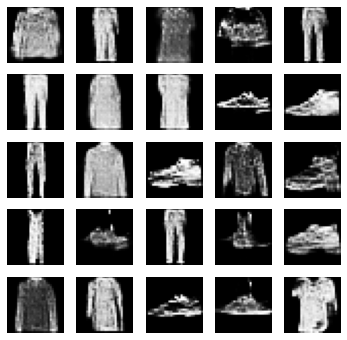

In [30]:
def load_fake_images():
  df = pd.read_csv('GAN_images_100EPS.csv', sep = ',', header = None)
  df= np.array(df)
  print(df.shape)
  fake_imgs =  np.reshape(df, (-1,28,28,1))
  # print(df.max(), df.min(), sep=' ')
  # plt.imshow(df[4,:,:,0])
  print("The new shape of file is : ", fake_imgs.shape)

  fig = plt.figure(figsize=(6, 6))
  for i in range(25):
      plt.subplot(5, 5, i+1)
      plt.imshow(fake_imgs[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  return fake_imgs

imges= load_fake_images()


In [49]:
real_image =train_images[0:20000,:]
test_10 = testX[0:10000,:]
print(real_image.shape)

fake_image= imges[0:10000,:]
print(fake_image.shape)

(20000, 28, 28, 1)
(10000, 28, 28, 1)


In [41]:
model = load_model('FID_model_trained.h5')
model.pop()
# model.pop()
# model.summary()
model_2= model
# model_2.summary()


In [52]:
def calculate_fid(model,real_imgs, fake_imgs):
    
    real = model.predict(real_imgs)
    fake = model.predict(fake_imgs)
    
    mu1, sigma1 = real.mean(axis=0), cov(real, rowvar=False)
    mu2, sigma2 = fake.mean(axis=0), cov(fake, rowvar=False)
    
    ssdiff = np.sum((mu1 - mu2)**2.0)
    covmean = sqrtm(sigma1.dot(sigma2))
    if iscomplexobj(covmean):
        covmean = covmean.real
        
    # calculate score
    fid_score = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid_score

In [53]:
# fid between images1 and images1
fid = calculate_fid(model_2, real_image, fake_image)
print('FID (same): %.3f' % fid)

FID (same): 74.457
